In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Import the dataset

In [5]:
df = pd.read_csv('data/Cricket_Data_Limited.csv')

## Basic query on the dataset

- Shape of the dataset

In [7]:
df.shape

(2240, 14)

- Info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home        2240 non-null   object 
 1   away        2240 non-null   object 
 2   1st inn     2240 non-null   object 
 3   wckts       2240 non-null   int64  
 4   winner      2240 non-null   object 
 5   season      2240 non-null   int64  
 6   res         2240 non-null   object 
 7   won by      2240 non-null   object 
 8   venue name  2240 non-null   object 
 9   Straight    2240 non-null   int64  
 10  Square      2240 non-null   int64  
 11  Area        2240 non-null   float64
 12  Pitch       2240 non-null   object 
 13  runs        2240 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 245.1+ KB


- Check for any null values

In [10]:
df.isnull().sum()

home          0
away          0
1st inn       0
wckts         0
winner        0
season        0
res           0
won by        0
venue name    0
Straight      0
Square        0
Area          0
Pitch         0
runs          0
dtype: int64

## Conclusion
- The dataset has few no null values.

## Describe the dataset

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wckts,2240.0,5.528571,2.019796,0.00000,4.00000,6.0000,7.00000,10.00000
season,2240.0,2021.757143,1.061715,2020.00000,2021.00000,2022.0000,2023.00000,2023.00000
Straight,2240.0,71.885714,4.750625,65.00000,65.00000,72.0000,75.00000,78.00000
Square,2240.0,73.128571,6.010671,65.00000,68.00000,71.0000,80.00000,80.00000
Area,2240.0,16482.006817,1442.372402,15111.06066,15381.23763,16336.2818,16663.00743,19603.53816
runs,2240.0,184.771429,25.863169,126.00000,167.00000,188.5000,202.00000,257.00000


## Running some analysis

In [21]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(exclude= 'object').columns

In [22]:
print(f"Categorical Columns: {categorical_columns}")
print(f"Numerical Columns: {numerical_columns}")

Categorical Columns: Index(['home', 'away', '1st inn', 'winner', 'res', 'won by', 'venue name',
       'Pitch'],
      dtype='object')
Numerical Columns: Index(['wckts', 'season', 'Straight', 'Square', 'Area', 'runs'], dtype='object')


- Dropping irrelevant columns

In [23]:
r = ['home', 'away', '1st inn', 'winner', 'season', 'res', 'won by', 'venue name', 'Straight', 'Square']
df.drop(labels = r, axis = 1, inplace = True)
df.head()

,wckts,Area,Pitch,runs
0,8,19603.53816,bat,193
1,7,19603.53816,bowl,169
2,4,19603.53816,bat,216
3,4,19603.53816,bat,192
4,6,19603.53816,bat,181


In [24]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(exclude= 'object').columns

In [25]:
print(f"Categorical Columns: {categorical_columns}")
print(f"Numerical Columns: {numerical_columns}")

Categorical Columns: Index(['Pitch'], dtype='object')
Numerical Columns: Index(['wckts', 'Area', 'runs'], dtype='object')


- Univariate Analysis

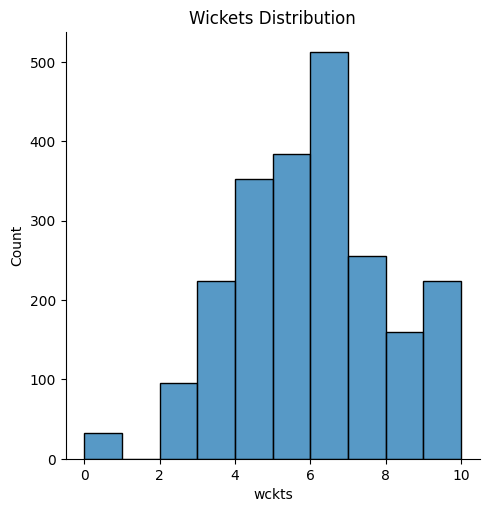

In [19]:
#Wickets Distribution
sns.displot(df['wckts'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

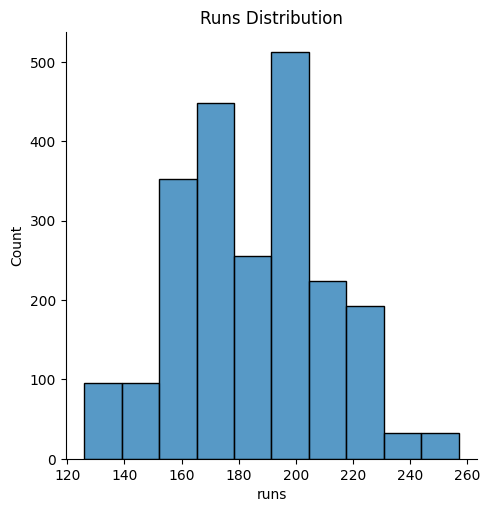

In [20]:
#Runs Distribution
sns.displot(df['runs'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

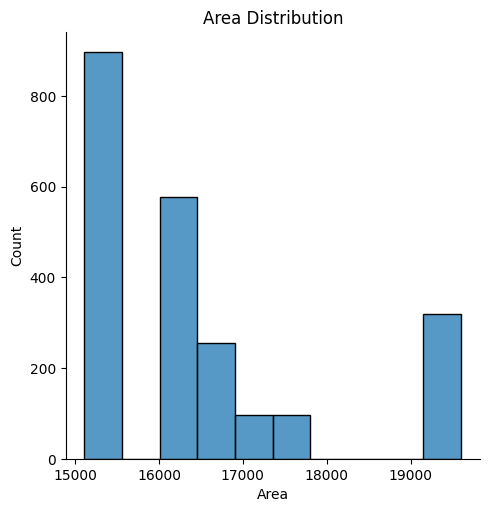

In [26]:
#Area Distribution
sns.displot(df['Area'],kde=False,bins=10)
plt.title("Area Distribution")

plt.show()